# SUPERVISED LEARNING

In [ ]:
# Dependent Variable (Target): Weekly_Sales
# Independent Variables : (Features): Store,Type,Size,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1 to MarkDown5,CPI,Unemployment

# READING CSV FILE:

In [1]:
import pandas as pd

In [2]:
store = pd.read_csv('/content/stores_data_set.csv')

In [3]:
sales = pd.read_csv('/content/sales_data_set.csv')

In [4]:
features = pd.read_csv('/content/Features_data_set.csv')

In [5]:
store.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [6]:
sales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [7]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [8]:
store.shape

(45, 3)

In [9]:
sales.shape

(421570, 5)

In [10]:
features.shape

(8190, 12)

In [11]:
# Merge the DataFrames on common columns
df = pd.merge(store, sales, on=['Store'], how='inner')
df = pd.merge(df, features, on=['Store', 'Date'], how='inner')

In [12]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


# Data Cleaning

In [13]:
# Drop the redundant column 'IsHoliday_y'
df.drop('IsHoliday_y', axis=1, inplace=True)

In [14]:
df.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)

In [15]:
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,A,151315,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,A,151315,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,A,151315,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,93,26/10/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,B,118221,94,26/10/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,B,118221,95,26/10/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,B,118221,97,26/10/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [16]:
# checking data type
df.dtypes

Store             int64
Type             object
Size              int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [17]:
# Convert 'Date' column to datetime format

df['Date']  = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [18]:
# 'IsHoliday' column will have values of 1 where it was True and 0 where it was False.
df['IsHoliday'] = df['IsHoliday'].astype(int)

In [19]:
# Categorical Feature Counts:
categorical_counts = df['Type'].value_counts()
print(categorical_counts)

A    215478
B    163495
C     42597
Name: Type, dtype: int64


In [20]:
# Mapping 'Type' categories to numeric values
type_mapping = {'A': 1, 'B': 2, 'C': 3}
df['Type'] = df['Type'].map(type_mapping)

In [21]:
df.dtypes

Store                    int64
Type                     int64
Size                     int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

# Handling Missing Values:

In [22]:
# Calculate the total number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / len(df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})

print(missing_data)


              Missing Values  Percentage
Store                      0    0.000000
Type                       0    0.000000
Size                       0    0.000000
Dept                       0    0.000000
Date                       0    0.000000
Weekly_Sales               0    0.000000
IsHoliday                  0    0.000000
Temperature                0    0.000000
Fuel_Price                 0    0.000000
MarkDown1             270889   64.257181
MarkDown2             310322   73.611025
MarkDown3             284479   67.480845
MarkDown4             286603   67.984676
MarkDown5             270138   64.079038
CPI                        0    0.000000
Unemployment               0    0.000000


In [ ]:
# Markdown_columns  ---> Markdown refers to promotional discounts or reductions in prices.(weekly deduction for all dept)
# Markup ---> (price increased based on demand)refers to the difference between the cost of a product or service and its selling price.(weekly)

In [23]:
# Filling missing values with zeros,because there is no markdown or markup given by store for that particular week
df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

In [24]:
df.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

# De_duplication

In [25]:
a = df.duplicated().sum()

In [26]:
print("Total Duplicated datapoints:",a)

Total Duplicated datapoints: 0


# EXPLORATORY DATA ANALYSIS(EDA):

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Type          421570 non-null  int64         
 2   Size          421570 non-null  int64         
 3   Dept          421570 non-null  int64         
 4   Date          421570 non-null  datetime64[ns]
 5   Weekly_Sales  421570 non-null  float64       
 6   IsHoliday     421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [28]:
# Summary Statistics:
summary_stats = df.describe()
print(summary_stats)

               Store           Type           Size           Dept  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546       1.589912  136727.915739      44.260317   
std        12.785297       0.666337   60980.583328      30.492054   
min         1.000000       1.000000   34875.000000       1.000000   
25%        11.000000       1.000000   93638.000000      18.000000   
50%        22.000000       1.000000  140167.000000      37.000000   
75%        33.000000       2.000000  202505.000000      74.000000   
max        45.000000       3.000000  219622.000000      99.000000   

        Weekly_Sales      IsHoliday    Temperature     Fuel_Price  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123       0.070358      60.090059       3.361027   
std     22711.183519       0.255750      18.447931       0.458515   
min     -4988.940000       0.000000      -2.060000       2.472000   
25%      2079.650000       0.0000

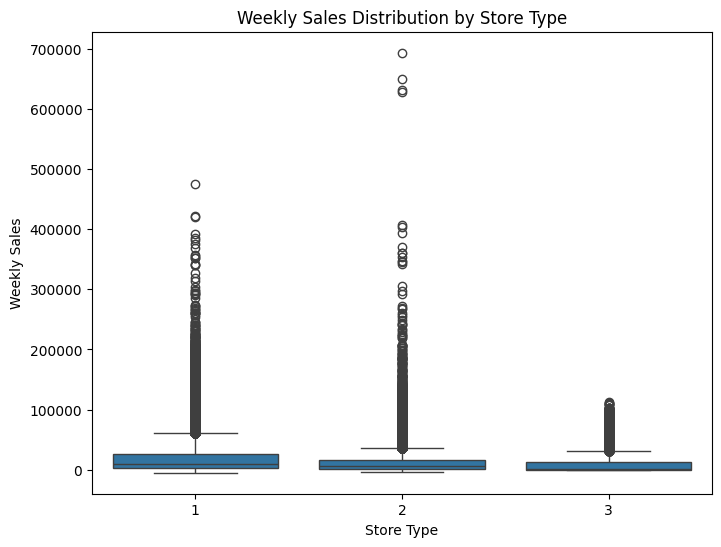

In [29]:
# Boxplot for Weekly Sales by Store Type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution by Store Type')
plt.show()


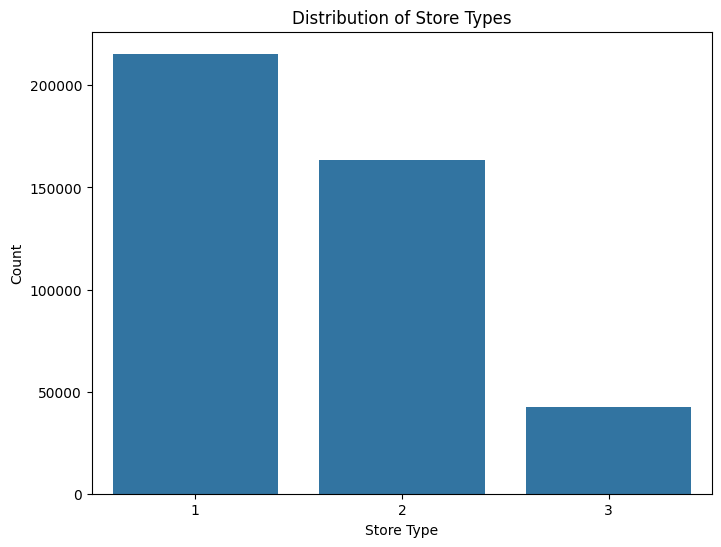

In [30]:
import seaborn as sns

# Countplot for Store Types
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.title('Distribution of Store Types')
plt.show()


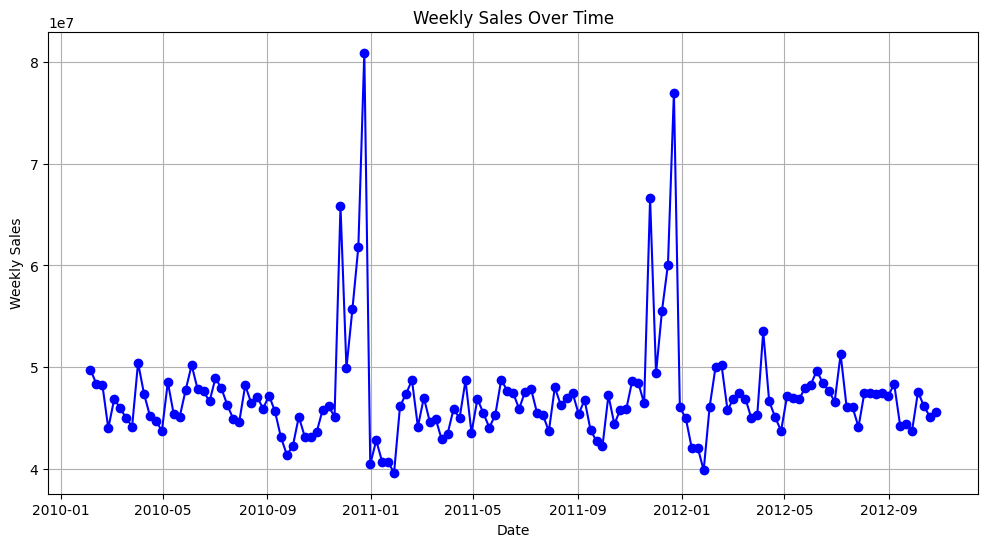

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Date' and calculate the sum of 'Weekly_Sales'
weekly_sales_over_time = df.groupby('Date')['Weekly_Sales'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales_over_time, marker='o', linestyle='-', color='b')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


<ipython-input-32-467de0599acb>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


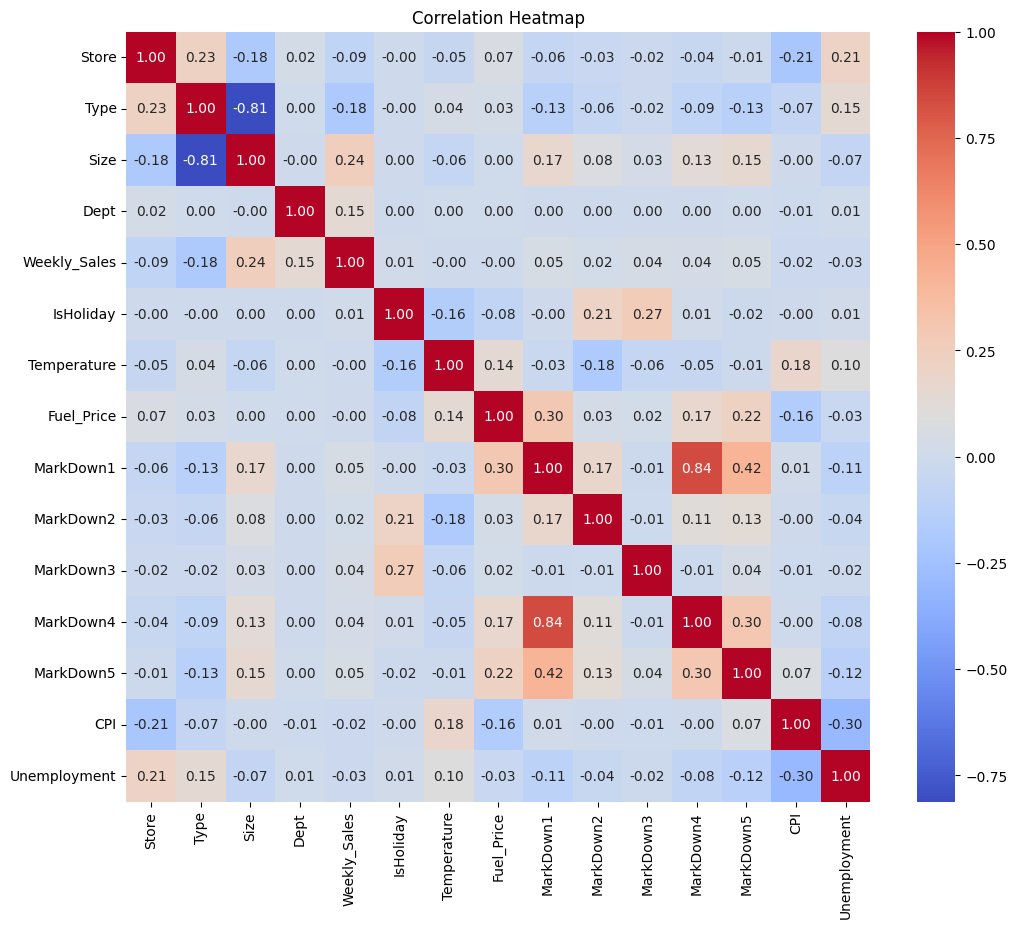


Correlation Matrix:
                 Store      Type      Size      Dept  Weekly_Sales  IsHoliday  \
Store         1.000000  0.226410 -0.182881  0.024004     -0.085195  -0.000548   
Type          0.226410  1.000000 -0.811593  0.003708     -0.182242  -0.000798   
Size         -0.182881 -0.811593  1.000000 -0.002966      0.243828   0.000593   
Dept          0.024004  0.003708 -0.002966  1.000000      0.148032   0.000916   
Weekly_Sales -0.085195 -0.182242  0.243828  0.148032      1.000000   0.012774   
IsHoliday    -0.000548 -0.000798  0.000593  0.000916      0.012774   1.000000   
Temperature  -0.050097  0.042981 -0.058313  0.004437     -0.002312  -0.155949   
Fuel_Price    0.065290  0.029687  0.003361  0.003572     -0.000120  -0.078281   
MarkDown1    -0.059844 -0.126345  0.169788  0.001494      0.047172  -0.003521   
MarkDown2    -0.033829 -0.055318  0.078372  0.000587      0.020716   0.207604   
MarkDown3    -0.020331 -0.024013  0.033641  0.001475      0.038562   0.266471   
MarkDow

In [32]:
# Correlation Heatmap:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

# Print the correlation values
print("\nCorrelation Matrix:")
print(correlation_matrix)


In [ ]:
# There is a positive correlation between 'Size' and 'Weekly_Sales', indicating that larger stores tend to have higher weekly sales.
# IsHoliday' shows a slight positive correlation with 'MarkDown3', 'MarkDown4', and 'MarkDown5', suggesting that markdowns might be more prevalent during holidays
# 'Unemployment' has a negative correlation with 'CPI', indicating a potential relationship between unemployment rates and consumer price index.

# Feature Engineering:

In [33]:
# Calculate 'Markdown_Total' by summing up all Markdowns
df['Markdown_Total'] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)

In [34]:
# Feature engineering for date-related features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [35]:
# Drop the original 'Date' column
df = df.drop('Date', axis=1)

In [36]:
df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Store           421570 non-null  int64  
 1   Type            421570 non-null  int64  
 2   Size            421570 non-null  int64  
 3   Dept            421570 non-null  int64  
 4   Weekly_Sales    421570 non-null  float64
 5   IsHoliday       421570 non-null  int64  
 6   Temperature     421570 non-null  float64
 7   Fuel_Price      421570 non-null  float64
 8   CPI             421570 non-null  float64
 9   Unemployment    421570 non-null  float64
 10  Markdown_Total  421570 non-null  float64
 11  Day             421570 non-null  int64  
 12  Month           421570 non-null  int64  
 13  Year            421570 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 48.2 MB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Type,421570.0,1.589912,0.666337,1.000,1.000000,1.00000,2.000000,3.000000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
IsHoliday,421570.0,0.070358,0.255750,0.000,0.000000,0.00000,0.000000,1.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000


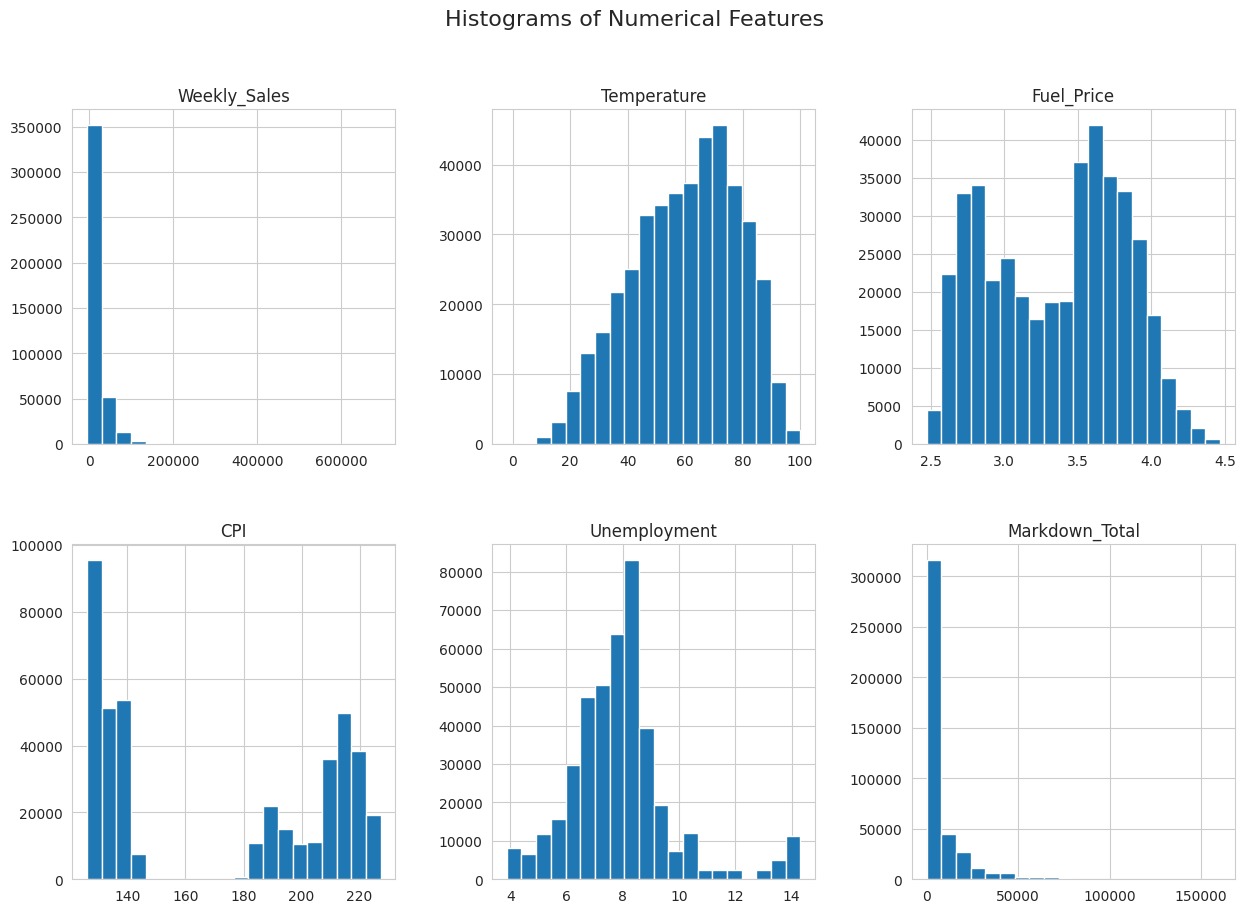

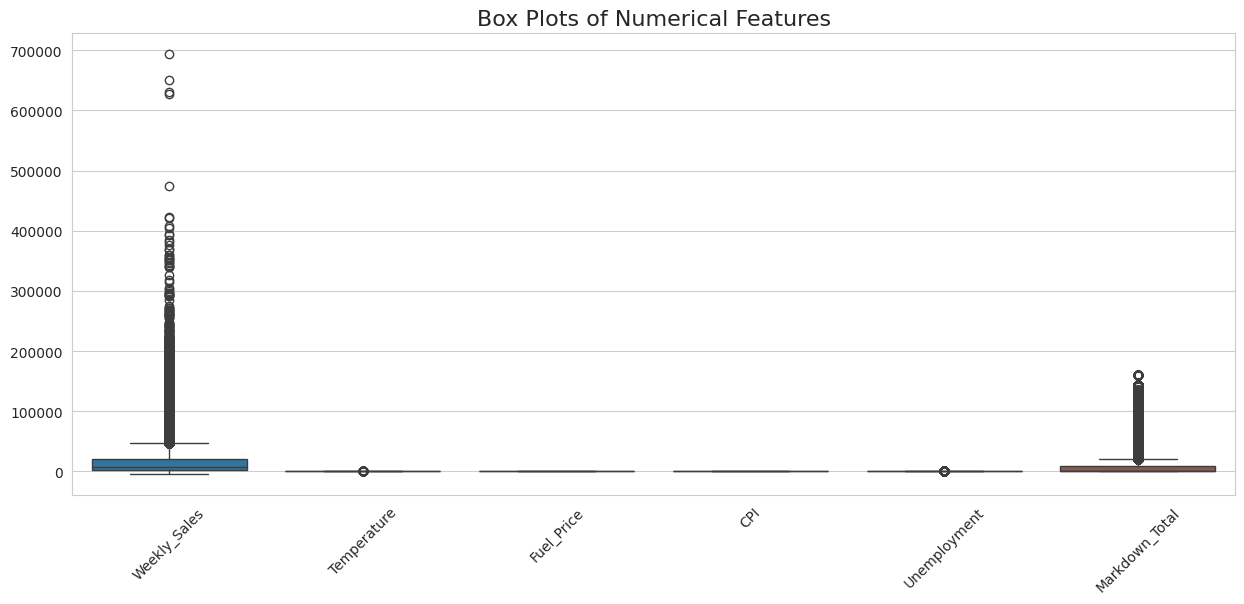

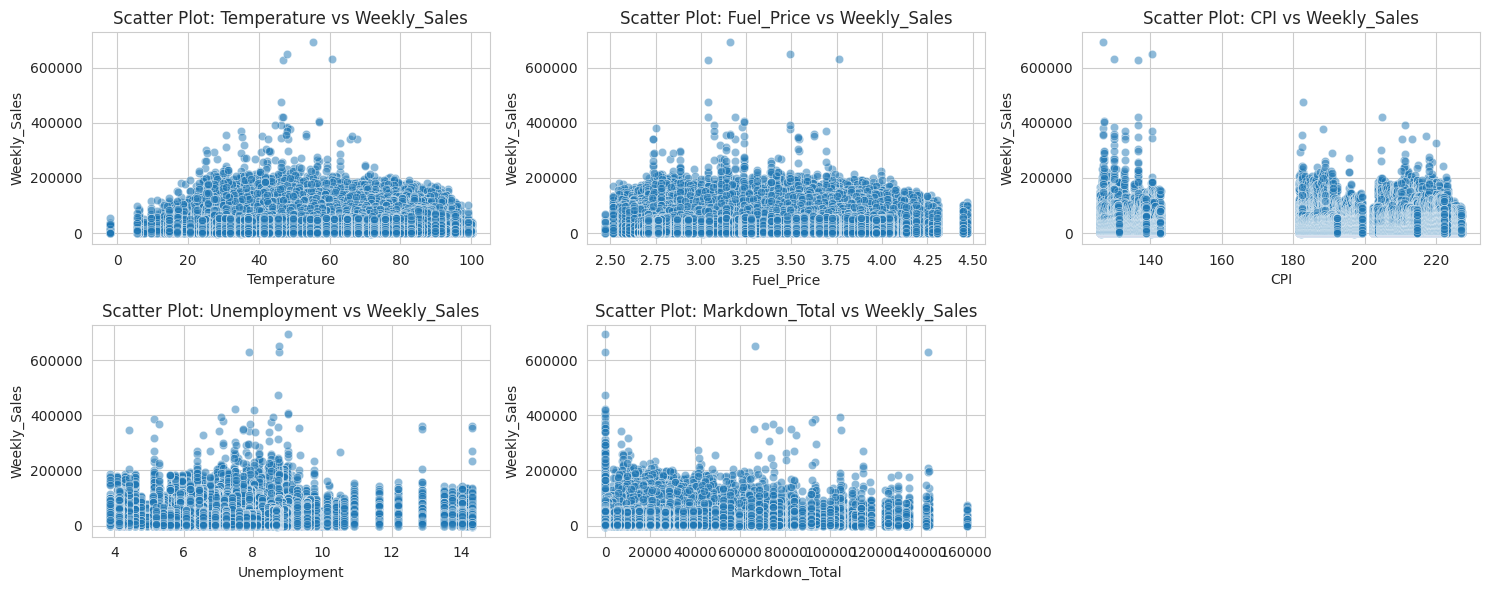

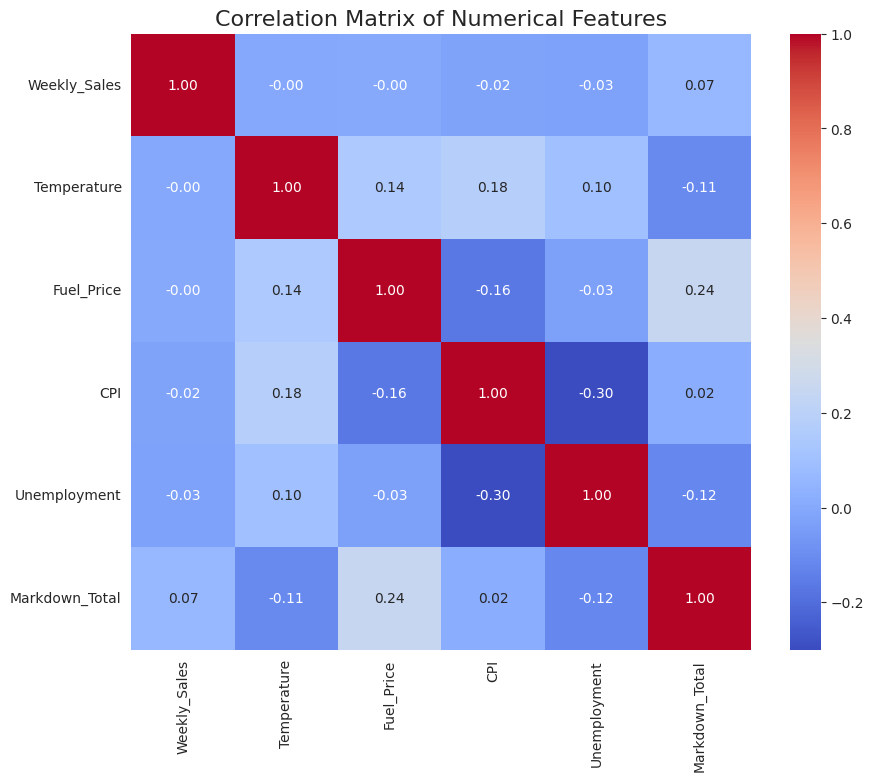

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Histograms of numerical features
numerical_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Markdown_Total']
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

# Box plots of numerical features
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numerical_features])
plt.title('Box Plots of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.show()

# Scatter plots of numerical features against Weekly_Sales
plt.figure(figsize=(15, 6))
for i, feature in enumerate(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Markdown_Total'], start=1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='Weekly_Sales', data=df, alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Weekly_Sales', fontsize=12)
plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()


# Identifying Outliers

In [40]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')
    plt.show()

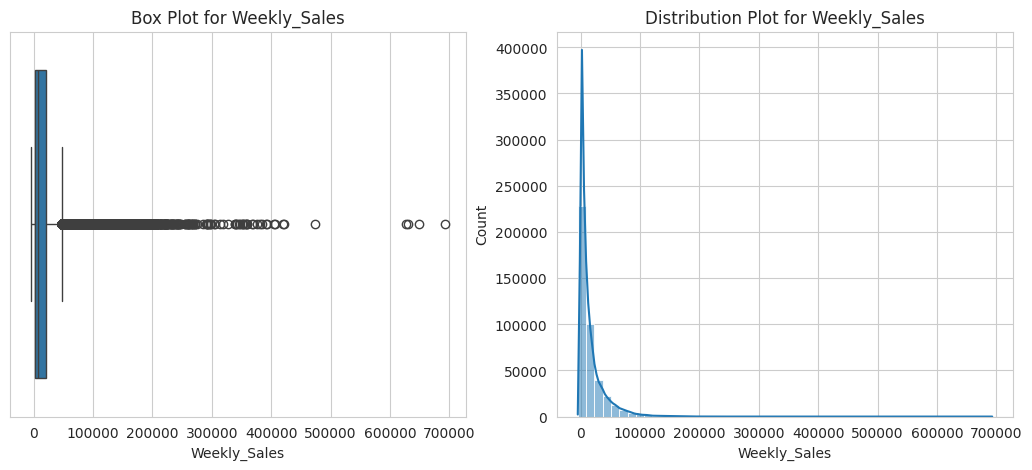

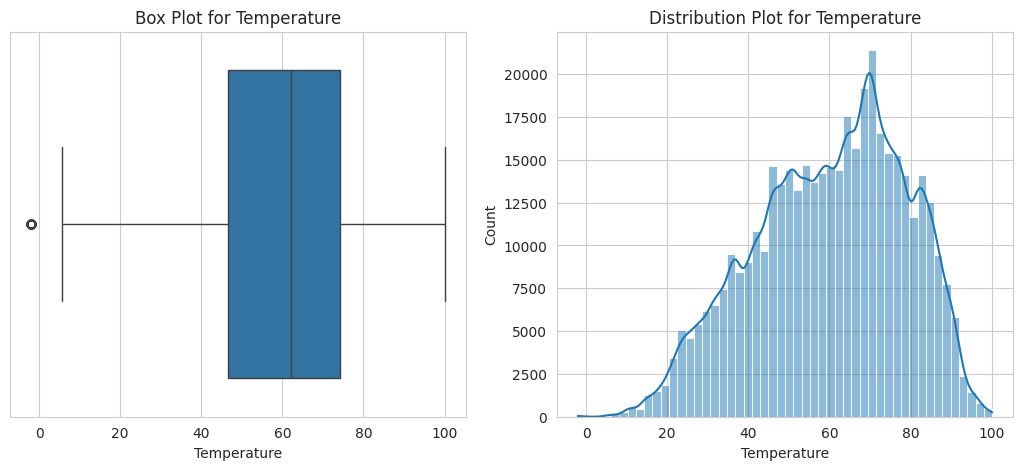

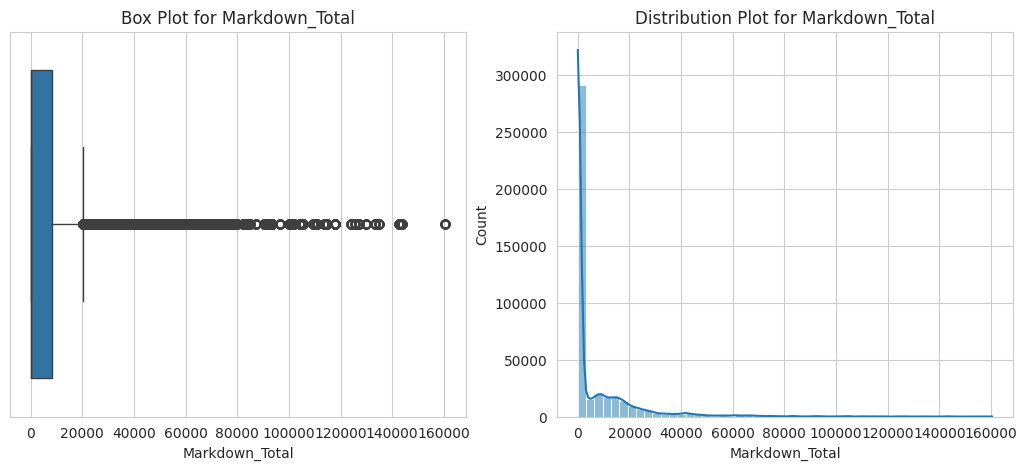

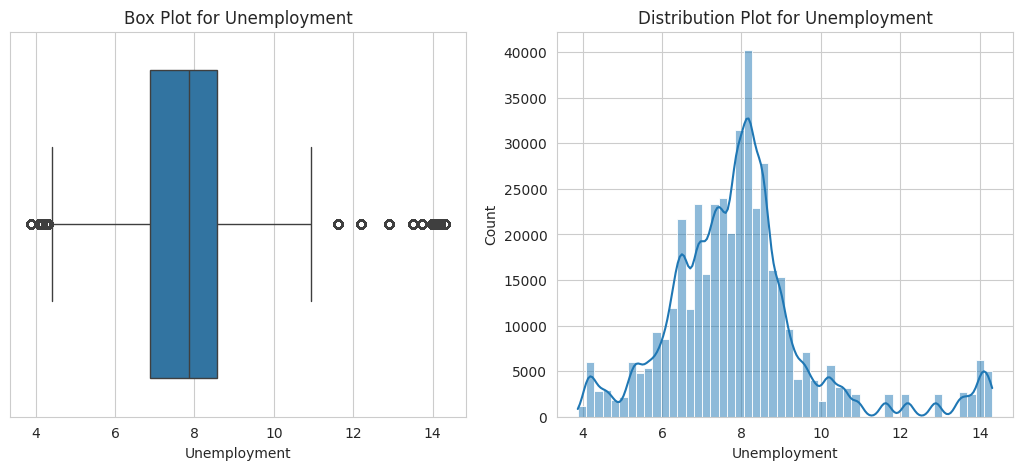

In [41]:
for i in ['Weekly_Sales', 'Temperature', 'Markdown_Total', 'Unemployment']:
    plot(df, i)

In [42]:
from scipy.stats import skew

# Assuming your data is in a DataFrame called 'df'
columns_to_check = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Markdown_Total', 'CPI', 'Unemployment']

for column in columns_to_check:
    skewness_value = skew(df[column])
    print(f'Skewness for {column}: {skewness_value}')


Skewness for Weekly_Sales: 3.2619965788116922
Skewness for Temperature: -0.32140300837175534
Skewness for Fuel_Price: -0.1049011223750906
Skewness for Markdown_Total: 3.89089180536912
Skewness for CPI: 0.08521898151118588
Skewness for Unemployment: 1.1837383565857527


In [43]:
# Add a small constant to the original values before applying the log transformation
import numpy as np

small_const = 1
df1 = df.copy()
df1['Weekly_Sales_log'] = np.log(df1['Weekly_Sales'] + small_const)
df1['Temperature_log'] = np.log(df1['Temperature'] + small_const)
df1['MarkDown_Total_log'] = np.log(df1['Markdown_Total'] + small_const)
df1['Unemployment_log'] = np.log(df1['Unemployment'] + small_const)

# Display the transformed DataFrame
print(df1)


        Store  Type    Size  Dept  Weekly_Sales  IsHoliday  Temperature  \
0           1     1  151315     1      24924.50          0        42.31   
1           1     1  151315     2      50605.27          0        42.31   
2           1     1  151315     3      13740.12          0        42.31   
3           1     1  151315     4      39954.04          0        42.31   
4           1     1  151315     5      32229.38          0        42.31   
...       ...   ...     ...   ...           ...        ...          ...   
421565     45     2  118221    93       2487.80          0        58.85   
421566     45     2  118221    94       5203.31          0        58.85   
421567     45     2  118221    95      56017.47          0        58.85   
421568     45     2  118221    97       6817.48          0        58.85   
421569     45     2  118221    98       1076.80          0        58.85   

        Fuel_Price         CPI  Unemployment  Markdown_Total  Day  Month  \
0            2.572  211

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


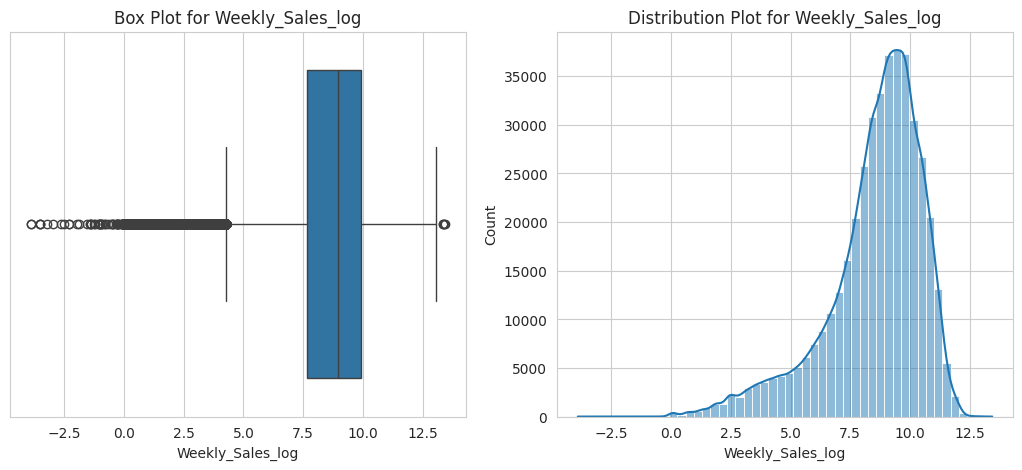

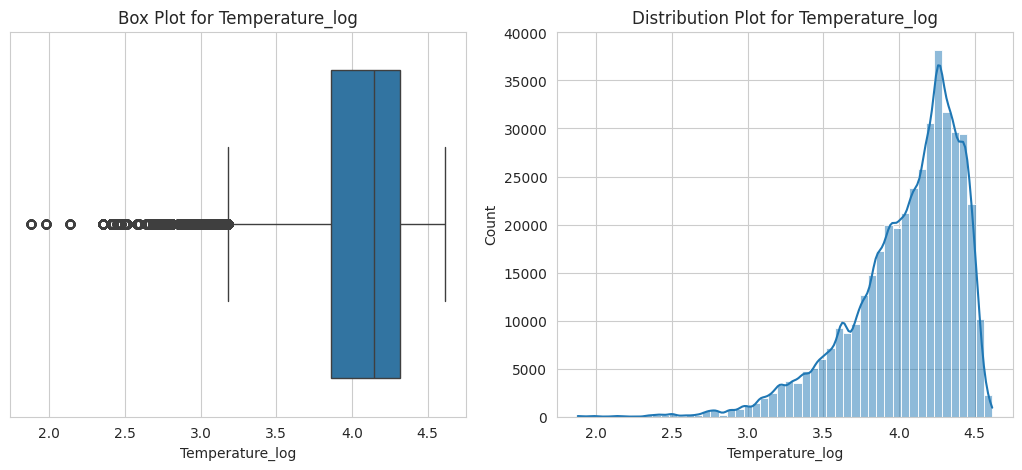

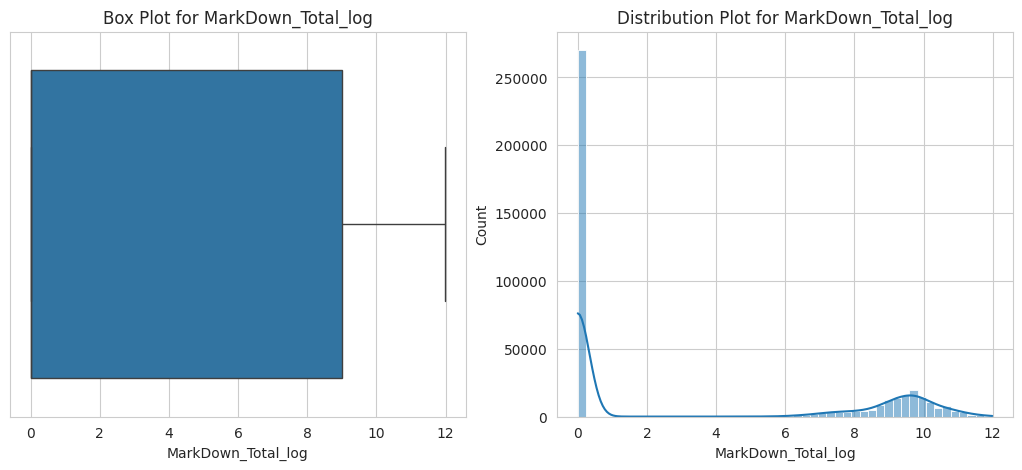

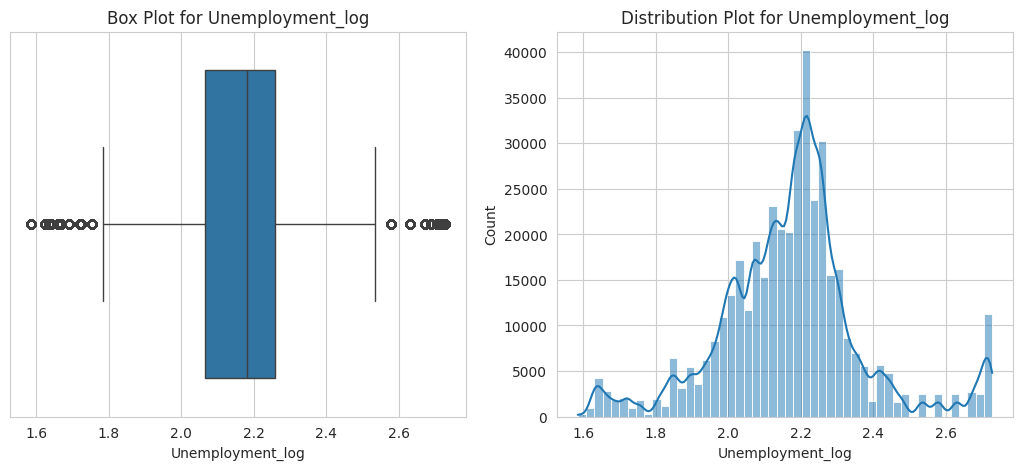

In [44]:
# after log transformation the data reduced the skewness. [hist plot ]

for i in ['Weekly_Sales_log','Temperature_log','MarkDown_Total_log','Unemployment_log']:
     plot(df1, i)

In [45]:
from scipy.stats import skew

# List of transformed variables
transformed_variables = ['Weekly_Sales_log', 'Temperature_log', 'MarkDown_Total_log', 'Unemployment_log']

# Calculate skewness for each transformed variable
skewness_results = {}
for variable in transformed_variables:
    # Handle NaN values by replacing them with 0
    df1[variable] = df1[variable].replace([np.inf, -np.inf], np.nan).fillna(0)
    skewness = skew(df1[variable])
    skewness_results[variable] = skewness
    print(f'Skewness for {variable}: {skewness}')

# View skewness results
print("\nSkewness Results:")
print(skewness_results)

Skewness for Weekly_Sales_log: -1.2938072738603288
Skewness for Temperature_log: -1.3845298345226216
Skewness for MarkDown_Total_log: 0.6484001274081088
Skewness for Unemployment_log: 0.20124973604264695

Skewness Results:
{'Weekly_Sales_log': -1.2938072738603288, 'Temperature_log': -1.3845298345226216, 'MarkDown_Total_log': 0.6484001274081088, 'Unemployment_log': 0.20124973604264695}


In [46]:
# Outliers Handling - Interquartile Range (IQR) method
df2 = df1.copy()
df2

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Markdown_Total,Day,Month,Year,Weekly_Sales_log,Temperature_log,MarkDown_Total_log,Unemployment_log
0,1,1,151315,1,24924.50,0,42.31,2.572,211.096358,8.106,0.00,5,2,2010,10.123647,3.768384,0.000000,2.208934
1,1,1,151315,2,50605.27,0,42.31,2.572,211.096358,8.106,0.00,5,2,2010,10.831831,3.768384,0.000000,2.208934
2,1,1,151315,3,13740.12,0,42.31,2.572,211.096358,8.106,0.00,5,2,2010,9.528148,3.768384,0.000000,2.208934
3,1,1,151315,4,39954.04,0,42.31,2.572,211.096358,8.106,0.00,5,2,2010,10.595510,3.768384,0.000000,2.208934
4,1,1,151315,5,32229.38,0,42.31,2.572,211.096358,8.106,0.00,5,2,2010,10.380665,3.768384,0.000000,2.208934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,93,2487.80,0,58.85,3.882,192.308899,8.667,5247.26,26,10,2012,7.819556,4.091841,8.565652,2.268718
421566,45,2,118221,94,5203.31,0,58.85,3.882,192.308899,8.667,5247.26,26,10,2012,8.557242,4.091841,8.565652,2.268718
421567,45,2,118221,95,56017.47,0,58.85,3.882,192.308899,8.667,5247.26,26,10,2012,10.933437,4.091841,8.565652,2.268718
421568,45,2,118221,97,6817.48,0,58.85,3.882,192.308899,8.667,5247.26,26,10,2012,8.827392,4.091841,8.565652,2.268718


In [47]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [48]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outlier(df2, 'Weekly_Sales_log')
outlier(df2, 'Temperature_log')
outlier(df2, 'Unemployment_log')
outlier(df2, 'MarkDown_Total_log')
df2

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Markdown_Total,Day,Month,Year,Weekly_Sales_log,Temperature_log,MarkDown_Total_log,Unemployment_log
0,1,1,151315,1,24924.50,0,42.31,2.572,211.096358,8.106,0.00,5,2,2010,10.123647,3.768384,0.000000,2.208934
1,1,1,151315,2,50605.27,0,42.31,2.572,211.096358,8.106,0.00,5,2,2010,10.831831,3.768384,0.000000,2.208934
2,1,1,151315,3,13740.12,0,42.31,2.572,211.096358,8.106,0.00,5,2,2010,9.528148,3.768384,0.000000,2.208934
3,1,1,151315,4,39954.04,0,42.31,2.572,211.096358,8.106,0.00,5,2,2010,10.595510,3.768384,0.000000,2.208934
4,1,1,151315,5,32229.38,0,42.31,2.572,211.096358,8.106,0.00,5,2,2010,10.380665,3.768384,0.000000,2.208934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,93,2487.80,0,58.85,3.882,192.308899,8.667,5247.26,26,10,2012,7.819556,4.091841,8.565652,2.268718
421566,45,2,118221,94,5203.31,0,58.85,3.882,192.308899,8.667,5247.26,26,10,2012,8.557242,4.091841,8.565652,2.268718
421567,45,2,118221,95,56017.47,0,58.85,3.882,192.308899,8.667,5247.26,26,10,2012,10.933437,4.091841,8.565652,2.268718
421568,45,2,118221,97,6817.48,0,58.85,3.882,192.308899,8.667,5247.26,26,10,2012,8.827392,4.091841,8.565652,2.268718


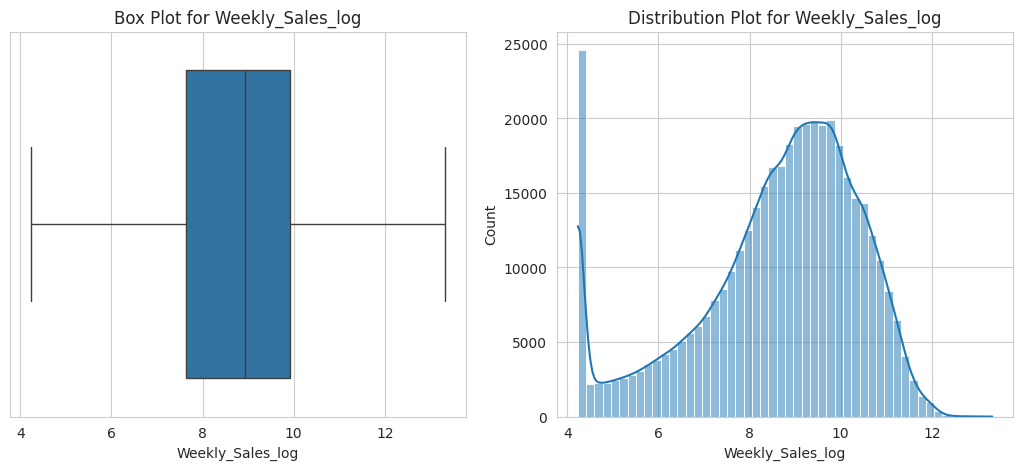

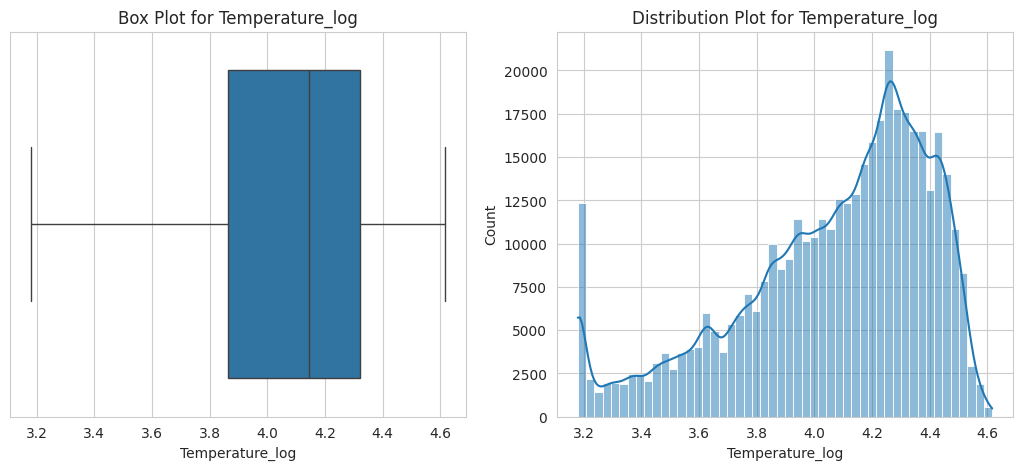

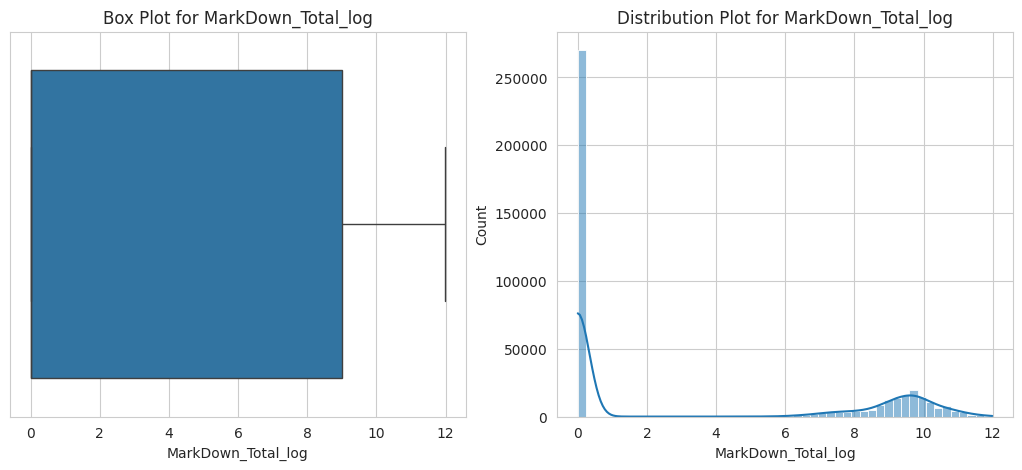

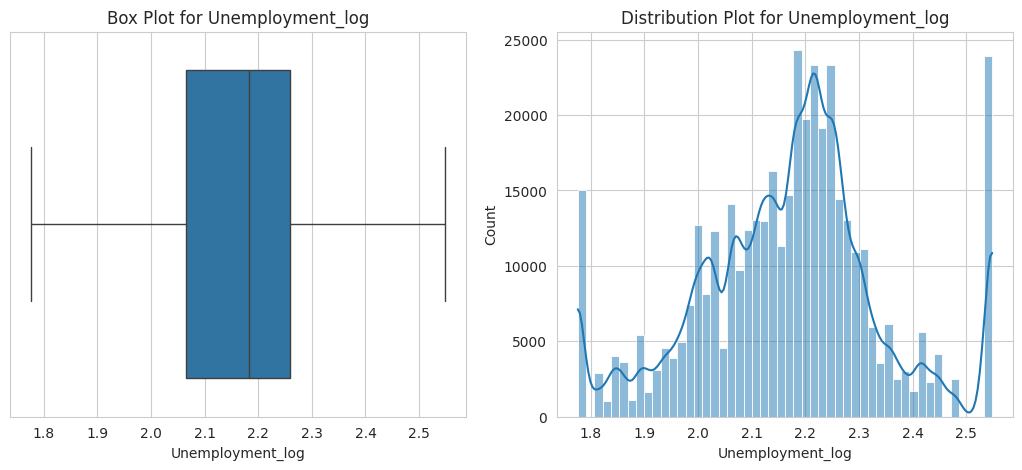

In [49]:
for i in ['Weekly_Sales_log','Temperature_log','MarkDown_Total_log','Unemployment_log']:
     plot(df2, i)

In [50]:
# Import the necessary library
from scipy.stats import skew

# List of columns to check for skewness
columns_to_check = ['Unemployment','Weekly_Sales_log', 'Temperature_log', 'MarkDown_Total_log', 'Unemployment_log']

# Print skewness for each column
for column in columns_to_check:
    print(f"Skewness for {column}: {df2[column].skew()}")


Skewness for Unemployment: 1.1837425684974345
Skewness for Weekly_Sales_log: -0.7883661602858908
Skewness for Temperature_log: -0.8639373540487846
Skewness for MarkDown_Total_log: 0.6484024345092142
Skewness for Unemployment_log: -0.028678758659209293


In [51]:
df3 = df2.drop(columns=['Weekly_Sales','Temperature','Markdown_Total','Unemployment'])
df3

,Store,Type,Size,Dept,IsHoliday,Fuel_Price,CPI,Day,Month,Year,Weekly_Sales_log,Temperature_log,MarkDown_Total_log,Unemployment_log
0,1,1,151315,1,0,2.572,211.096358,5,2,2010,10.123647,3.768384,0.000000,2.208934
1,1,1,151315,2,0,2.572,211.096358,5,2,2010,10.831831,3.768384,0.000000,2.208934
2,1,1,151315,3,0,2.572,211.096358,5,2,2010,9.528148,3.768384,0.000000,2.208934
3,1,1,151315,4,0,2.572,211.096358,5,2,2010,10.595510,3.768384,0.000000,2.208934
4,1,1,151315,5,0,2.572,211.096358,5,2,2010,10.380665,3.768384,0.000000,2.208934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2,118221,93,0,3.882,192.308899,26,10,2012,7.819556,4.091841,8.565652,2.268718
421566,45,2,118221,94,0,3.882,192.308899,26,10,2012,8.557242,4.091841,8.565652,2.268718
421567,45,2,118221,95,0,3.882,192.308899,26,10,2012,10.933437,4.091841,8.565652,2.268718
421568,45,2,118221,97,0,3.882,192.308899,26,10,2012,8.827392,4.091841,8.565652,2.268718


In [52]:
df3.dtypes

Store                   int64
Type                    int64
Size                    int64
Dept                    int64
IsHoliday               int64
Fuel_Price            float64
CPI                   float64
Day                     int64
Month                   int64
Year                    int64
Weekly_Sales_log      float64
Temperature_log       float64
MarkDown_Total_log    float64
Unemployment_log      float64
dtype: object

In [53]:
# Add a new column 'Expected_Sales' to calculate the sum of 'MarkDown_Total_log' and 'Weekly_Sales_log'
df4 = df3.copy()
df4['Expected_Sales'] = df4['MarkDown_Total_log'] + df4['Weekly_Sales_log']

# Display the DataFrame with the new column
print(df4)


        Store  Type    Size  Dept  IsHoliday  Fuel_Price         CPI  Day  \
0           1     1  151315     1          0       2.572  211.096358    5   
1           1     1  151315     2          0       2.572  211.096358    5   
2           1     1  151315     3          0       2.572  211.096358    5   
3           1     1  151315     4          0       2.572  211.096358    5   
4           1     1  151315     5          0       2.572  211.096358    5   
...       ...   ...     ...   ...        ...         ...         ...  ...   
421565     45     2  118221    93          0       3.882  192.308899   26   
421566     45     2  118221    94          0       3.882  192.308899   26   
421567     45     2  118221    95          0       3.882  192.308899   26   
421568     45     2  118221    97          0       3.882  192.308899   26   
421569     45     2  118221    98          0       3.882  192.308899   26   

        Month  Year  Weekly_Sales_log  Temperature_log  MarkDown_Total_log 

In [54]:
# Display summary statistics of the remaining columns
summary_statistics = df4.describe()
print(summary_statistics)

               Store           Type           Size           Dept  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546       1.589912  136727.915739      44.260317   
std        12.785297       0.666337   60980.583328      30.492054   
min         1.000000       1.000000   34875.000000       1.000000   
25%        11.000000       1.000000   93638.000000      18.000000   
50%        22.000000       1.000000  140167.000000      37.000000   
75%        33.000000       2.000000  202505.000000      74.000000   
max        45.000000       3.000000  219622.000000      99.000000   

           IsHoliday     Fuel_Price            CPI            Day  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean        0.070358       3.361027     171.201947      15.673131   
std         0.255750       0.458515      39.159276       8.753549   
min         0.000000       2.472000     126.064000       1.000000   
25%         0.000000       2.9330

In [55]:
# Save the DataFrame with selected columns to a CSV file
df4.to_csv('sales_prediction.csv', index=False)